# Practice Code
## Python 3.7
*Test exercises*

In [1]:
print ("Hello World")
val = input("Enter number: ")
new = int(val) * 3
print ("Your number is:", val, "Times three =", new)



Hello World
Enter number: 1
Your number is: 1 Times three = 3


In [2]:
x = [1 , 2 , 3 , 4]
print(x , x[1])


[1, 2, 3, 4] 2


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
wine = pd.read_csv('winequality-red.csv', sep=';')

In [5]:
wine.head(10) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#preprocessing
bins = (2, 5, 6, 8)
groupNames = ['bad', 'mediocre', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = groupNames)
wine['quality'].unique()

[bad, mediocre, good]
Categories (3, object): [bad < mediocre < good]

In [8]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [9]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [10]:
wine['quality'].value_counts()

0    744
2    638
1    217
Name: quality, dtype: int64

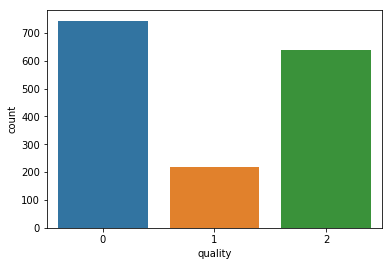

In [11]:
sns.countplot(wine['quality'])

In [12]:
#seperate into response (X) and feature (y) variables
X = wine.drop('quality', axis=1)
y = wine['quality']

In [13]:
#Split into train and test data groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#apply standard scaling to optimise result i.e scale all values to similar level to prevent bias
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#no fit used to ensure same fit between train and test
X_test = sc.transform(X_test)

# Random Forest Classifier

In [26]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [27]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       141
           1       0.75      0.51      0.61        47
           2       0.63      0.68      0.65       132

   micro avg       0.70      0.70      0.70       320
   macro avg       0.71      0.66      0.68       320
weighted avg       0.70      0.70      0.70       320

[[110   1  30]
 [  0  24  23]
 [ 35   7  90]]


# SVM Classifier

In [17]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [18]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       141
           1       0.68      0.28      0.39        47
           2       0.55      0.59      0.57       132

   micro avg       0.63      0.63      0.63       320
   macro avg       0.64      0.55      0.57       320
weighted avg       0.63      0.63      0.62       320

[[110   0  31]
 [  2  13  32]
 [ 48   6  78]]


# Neural Network

In [75]:
mlpc = MLPClassifier(hidden_layer_sizes=(33), max_iter=2000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [76]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       141
           1       0.53      0.43      0.47        47
           2       0.59      0.60      0.59       132

   micro avg       0.64      0.64      0.64       320
   macro avg       0.61      0.59      0.60       320
weighted avg       0.64      0.64      0.64       320

[[107   4  30]
 [  2  20  25]
 [ 39  14  79]]


In [77]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_rfc)
acc2 = accuracy_score(y_test, pred_clf)
acc3 = accuracy_score(y_test, pred_mlpc)
print(acc)
print(acc2)
print(acc3)

0.7
0.628125
0.64375
